# Water Quality Explanatory Data Analysis
1. What will you learn from this project?
1. Bivariate and multivariate data analysis
1. Correlation analysis
1. Preprocessing: missing value, train-test split and normalization
1. Modelling: Decision Tree and Random Forest Classifiers
1. Visualize Decision Tree
1. Random Forest Hyperparameter Tuning


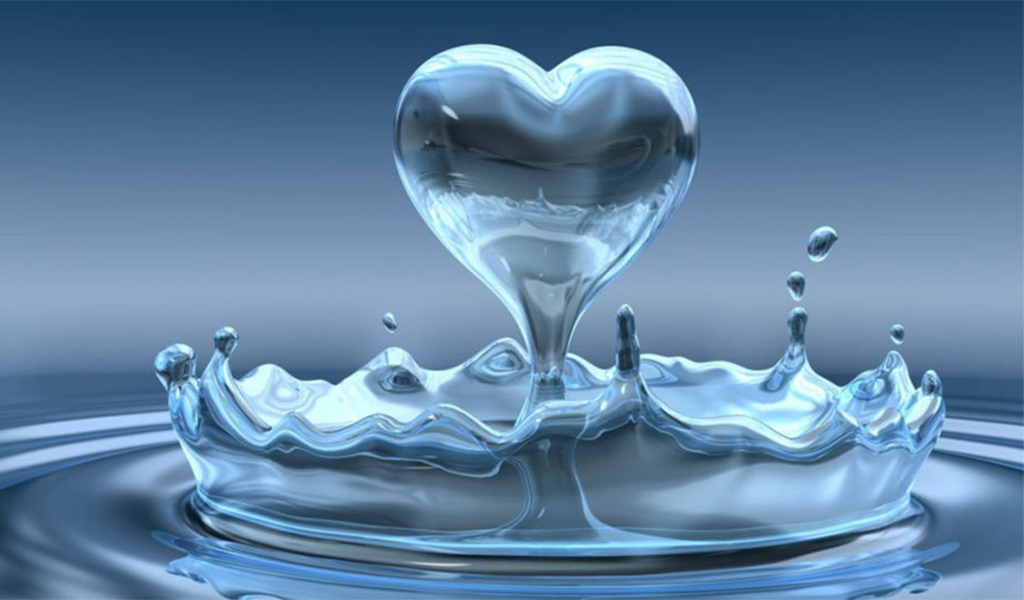




# Introduction



#### The Importance and Quality of Water

Water is the foundation of life and essential for maintaining health. Our bodies are largely composed of water, which plays a crucial role in functions like cellular nourishment and toxin elimination. Therefore, the quality of the water we consume directly impacts our well-being.

#### What Defines Quality Water?

Quality water should be colorless, odorless, and tasteless, free from harmful microorganisms, chemicals, and heavy metals. Ideal drinking water has a pH level between 6.5 and 8.5. Contaminants such as microbes, chemical waste, and physical pollutants can negatively affect water quality.

#### Protection Measures

To protect water sources, proper waste management is essential, along with the use of eco-friendly farming techniques and the effective operation of water treatment plants. Water conservation and mindful usage also play a key role in maintaining water quality.

In conclusion, water quality is vital to our health, making it our collective responsibility to safeguard our water resources.


## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Dependent Variable Analysis](#4)
1. [Correlation Between Features](#5)
1. [Distribution of Features](#6)
1. [Preprocessing: Missing Value Problem](#7)
1. [Preprocessing: Train-Test Split and Normalization](#8)
1. [Modelling: Decision Tree and Random Forest Classifiers](#9)
1. [Visualize Decision Tree](#10)
1. [Random Forest Hyperparameter Tuning](#11)
1. [Conclusion](#12)

<a id="1"></a>

## Python Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

/kaggle/input/water-potability/water_potability.csv


<a id="2"></a>
## Data Content

**Water Quality Parameters**

1. **pH Value:**  
The pH level is crucial for assessing the acid-base balance of water, indicating whether the water is acidic or alkaline. The World Health Organization (WHO) recommends a pH range of 6.5 to 8.5. The current study shows pH values between 6.52 and 6.83, which fall within WHO standards.

2. **Hardness:**  
Water hardness is primarily caused by calcium and magnesium salts, which dissolve as water flows through geological deposits. The duration of water contact with these materials influences the level of hardness. Hardness is traditionally defined by water's ability to precipitate soap, mainly due to the presence of calcium and magnesium.

3. **Total Dissolved Solids (TDS):**  
Water can dissolve various inorganic and some organic minerals or salts, such as potassium, calcium, sodium, and sulfates. These dissolved minerals can affect the taste and appearance of water. High TDS levels indicate that water is highly mineralized. The desirable TDS limit is 500 mg/L, with a maximum allowable limit of 1000 mg/L for drinking water.

4. **Chloramines:**  
Chloramines, formed by adding ammonia to chlorine, are commonly used as disinfectants in public water systems. Chlorine levels up to 4 milligrams per liter (mg/L) or 4 parts per million (ppm) are considered safe for drinking water.

5. **Sulfate:**  
Sulfates are naturally occurring in minerals, soil, and rocks and are also present in air, groundwater, plants, and food. While sulfate levels in seawater are about 2,700 mg/L, freshwater supplies typically range from 3 to 30 mg/L, though some areas may have much higher concentrations, up to 1000 mg/L.

6. **Conductivity:**  
Pure water is a poor conductor of electricity, but the presence of ions increases its conductivity. The amount of dissolved solids generally determines water's electrical conductivity (EC). WHO standards suggest that EC should not exceed 400 μS/cm.

7. **Organic Carbon:**  
Total Organic Carbon (TOC) in water originates from decaying natural organic matter and synthetic sources. TOC measures the total carbon content in organic compounds within water. According to the U.S. Environmental Protection Agency (EPA), TOC levels in treated drinking water should be less than 2 mg/L, and less than 4 mg/L in source water used for treatment.

8. **Trihalomethanes (THMs):**  
THMs are chemicals that can form in water treated with chlorine. Their concentration varies depending on the organic material present, the chlorine dosage, and the water temperature during treatment. THM levels up to 80 ppm are considered safe in drinking water.

9. **Turbidity:**  
Turbidity measures the cloudiness of water, which is influenced by the amount of suspended solid matter. It reflects water's light-emitting properties and is used to assess waste discharge quality regarding colloidal matter. The mean turbidity value observed (0.98 NTU) is lower than the WHO recommended limit of 5.00 NTU.

10. **Potability:**  
Potability indicates whether water is safe for human consumption, where a value of 1 means potable (safe to drink) and 0 means non-potable.

<a id="3"></a>
## Read and Analyse Data

In [2]:
df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.duplicated().sum()

0

<a id="4"></a>
## Dependent Variable Analysis 

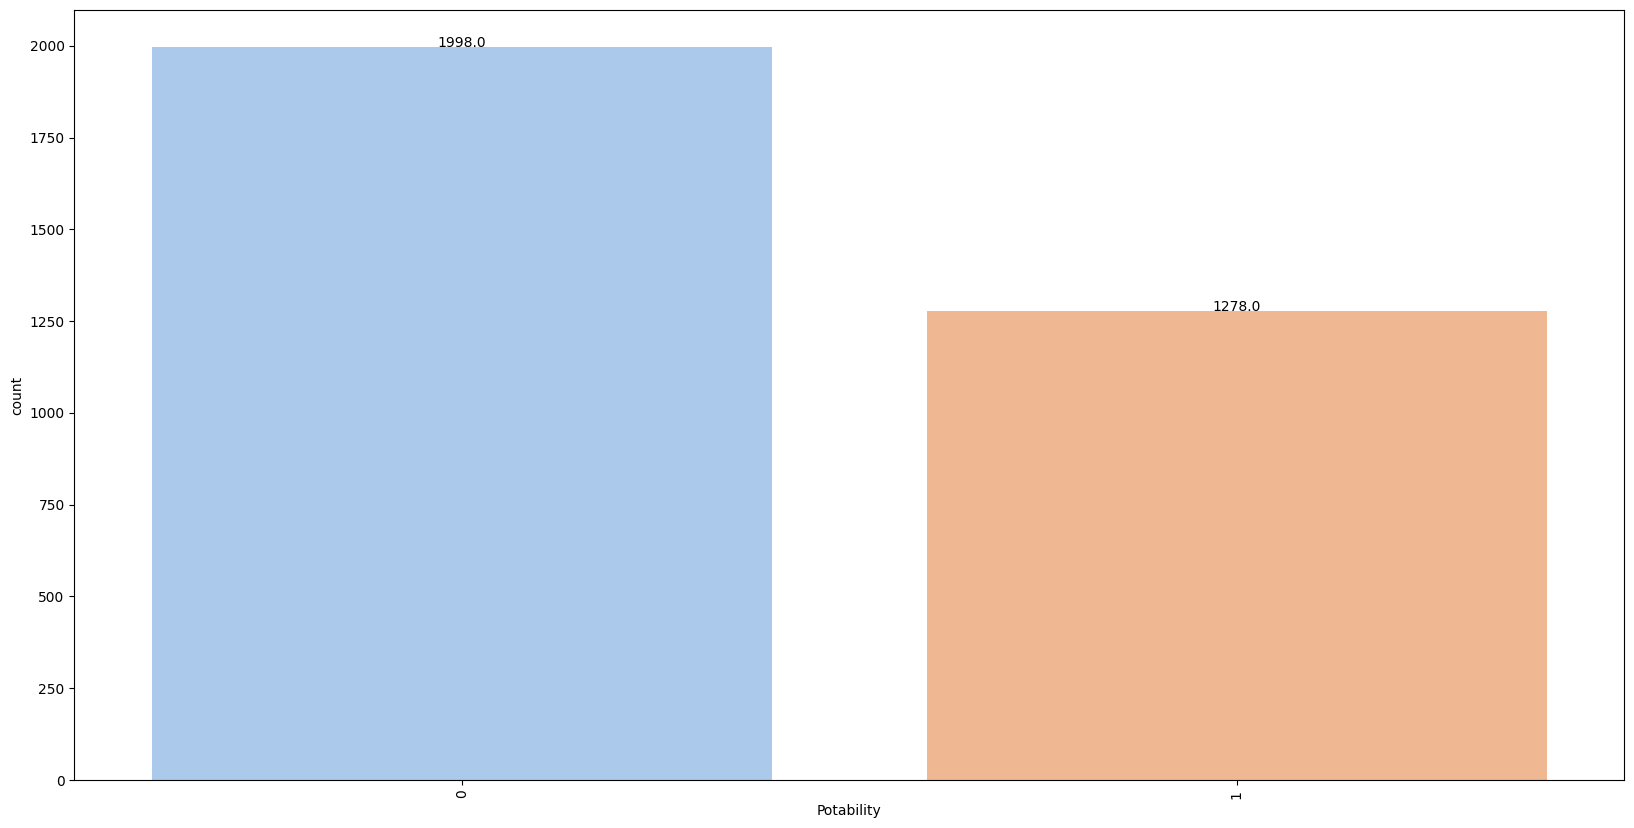

In [7]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'Potability' , data = df,palette='pastel')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<a id="5"></a>
## Correlation Between Features

In [8]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


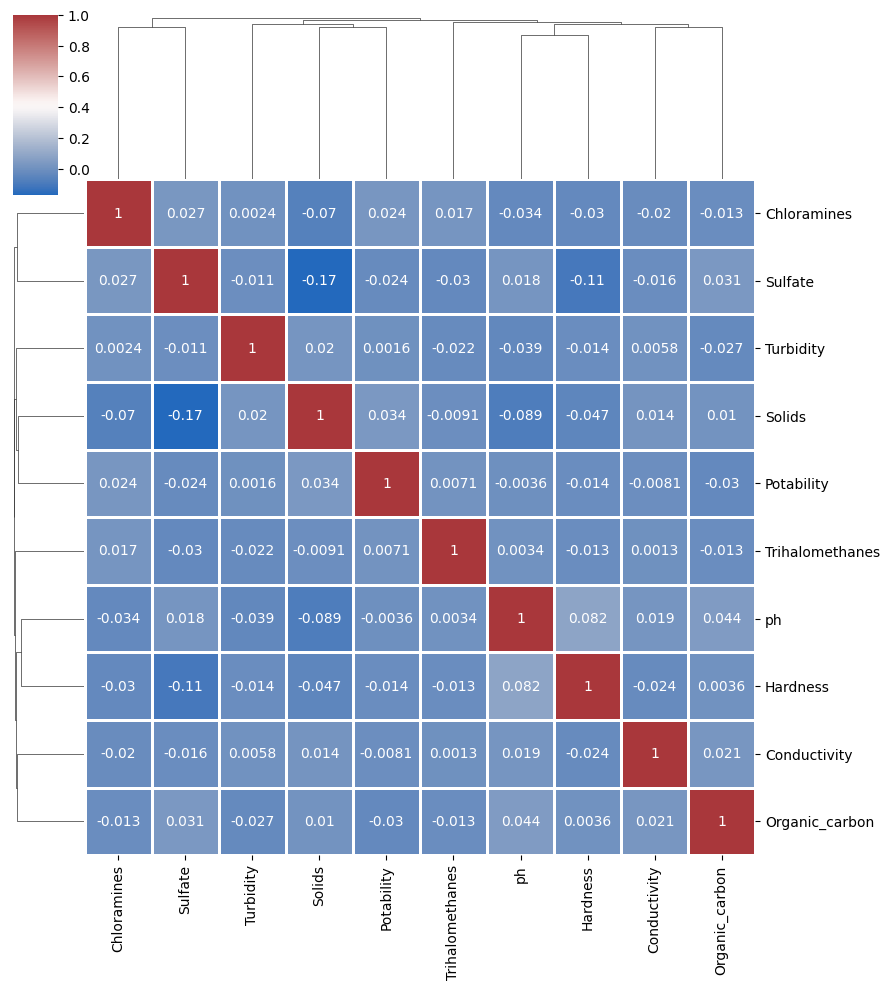

In [9]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

<a id="6"></a>
## Distribution of Features

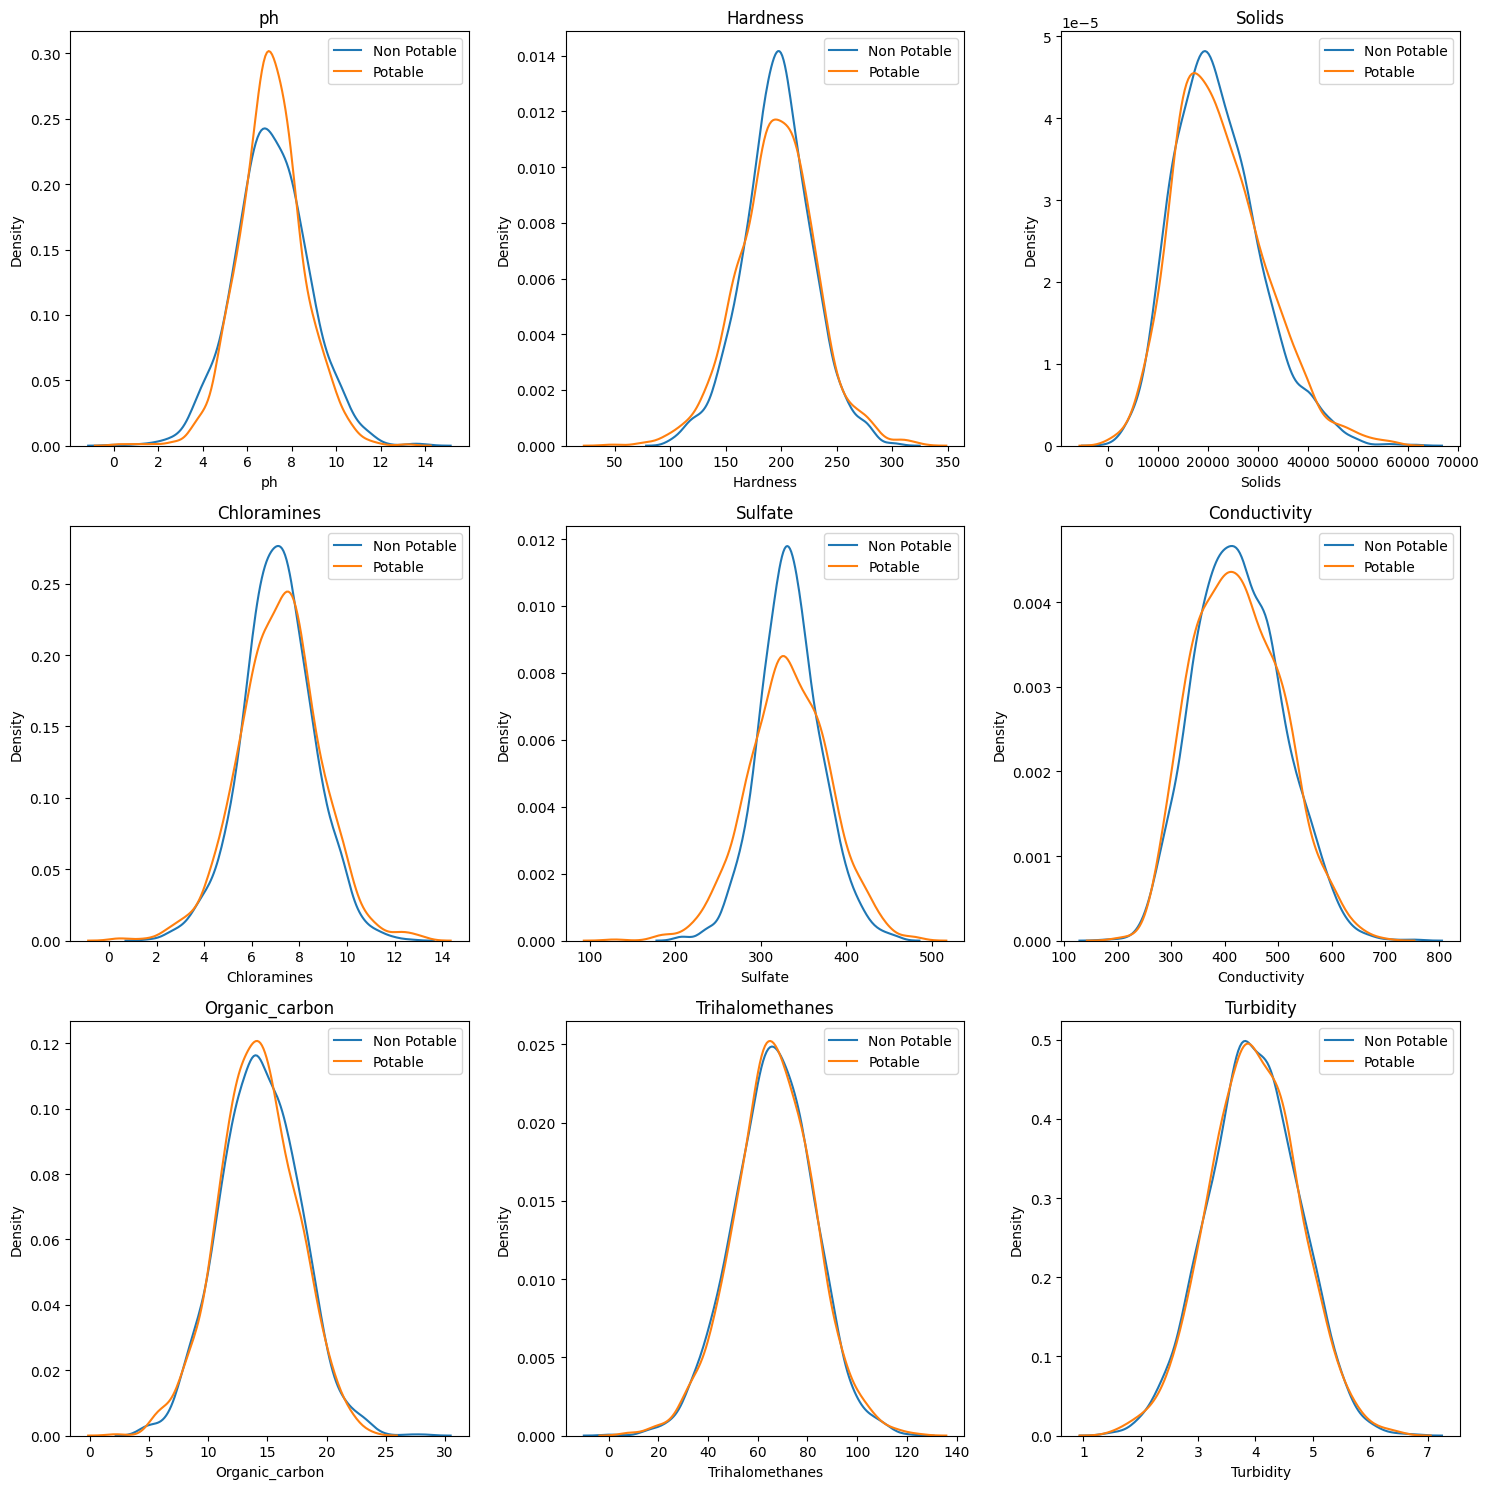

In [10]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

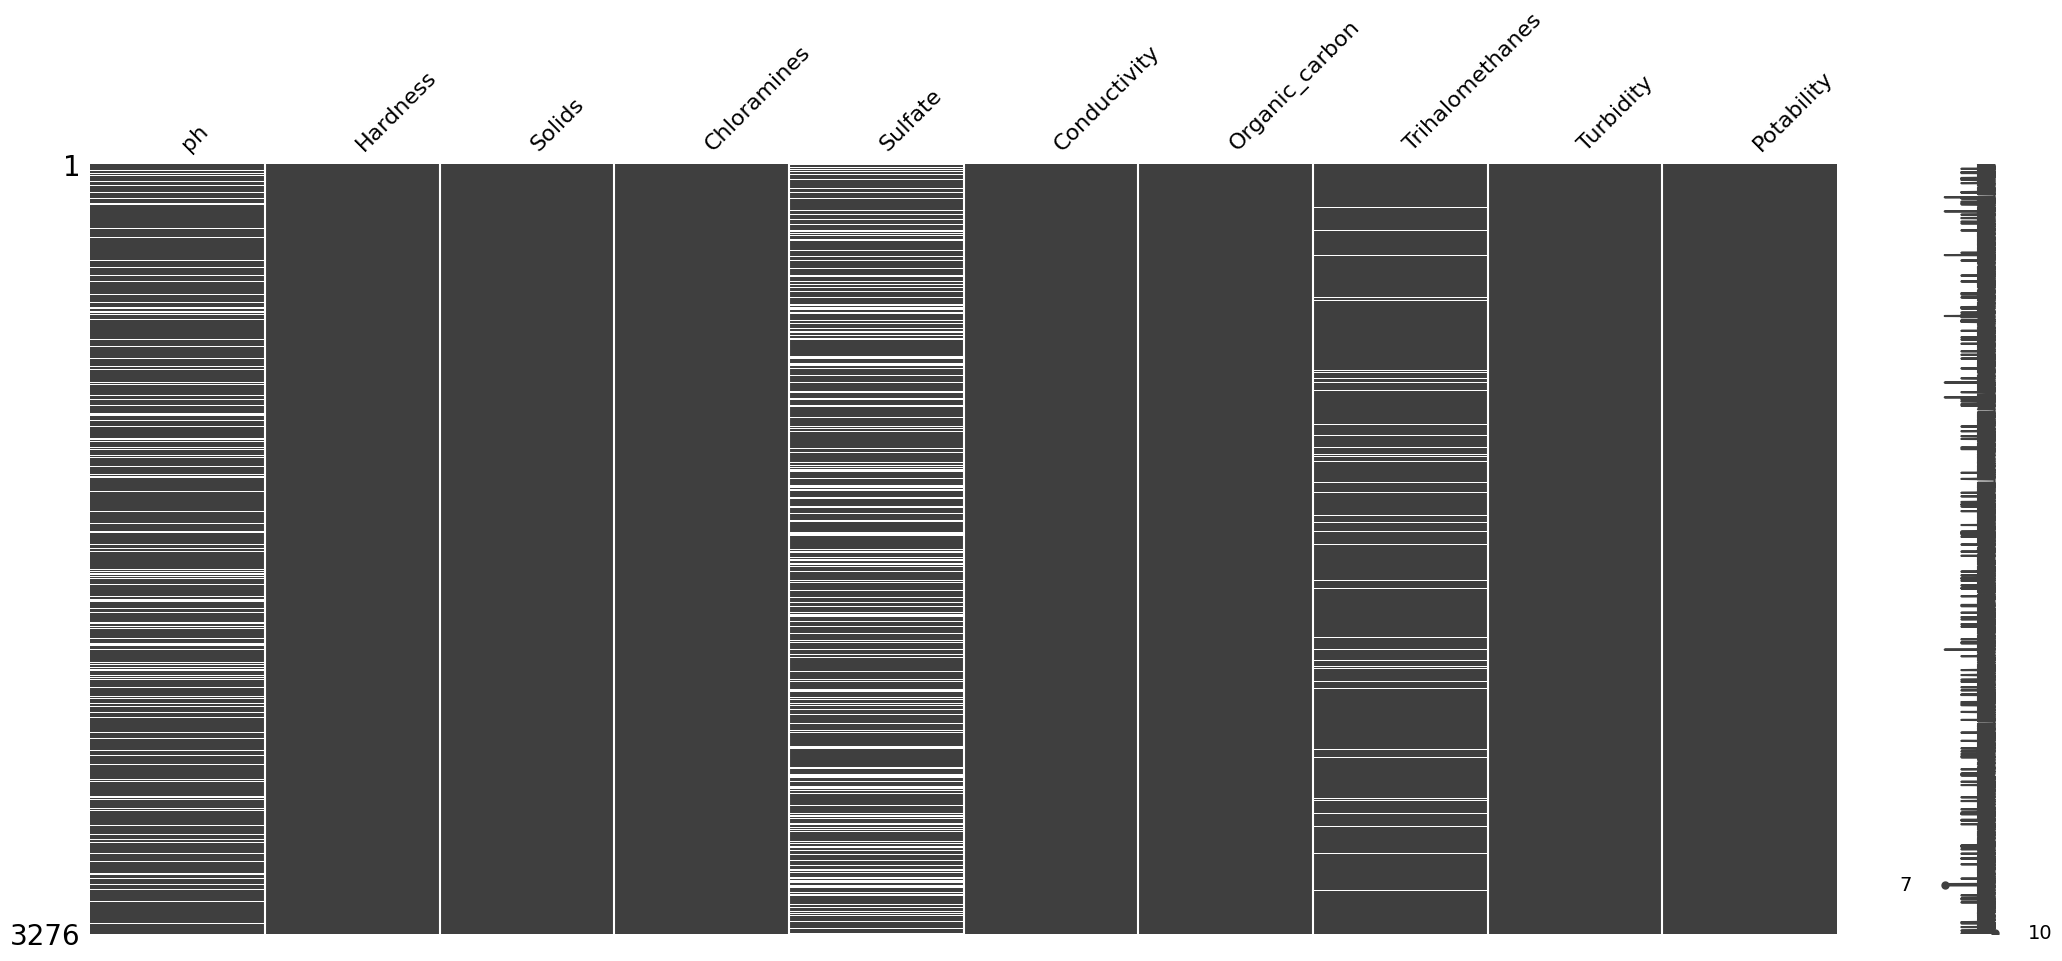

In [11]:
msno.matrix(df)
plt.show()

In [12]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
# handle missing value with average of features
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [14]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<a id="8"></a>
## Preprocessing: Train-Test Split and Normalization

In [15]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


In [17]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

<a id="9"></a>
## Modelling: Decision Tree and Random Forest Classifiers

**Decision Tree Classifier:**  
A Decision Tree is a supervised learning algorithm used for classification tasks. It works by splitting the data into subsets based on feature values, creating a tree-like model of decisions. Each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome or class label. The tree is built by recursively partitioning the data, aiming to minimize impurity (e.g., Gini impurity or entropy) at each split. Decision Trees are easy to interpret and visualize but can be prone to overfitting, especially with complex datasets.

**Random Forest Classifier:**  
Random Forest is an ensemble learning method that builds multiple Decision Trees and merges them to produce a more accurate and stable prediction. Each tree in the forest is trained on a random subset of the data (bagging) and considers a random subset of features when splitting nodes. This randomness reduces the likelihood of overfitting and enhances generalization. The final classification decision is made by averaging the predictions of all individual trees (majority voting for classification tasks). Random Forests are robust, handle large datasets well, and provide feature importance metrics.


In [18]:
models = [("DTC", DecisionTreeClassifier(max_depth = 3)),
          ("RF",RandomForestClassifier())]

In [19]:
finalResults = []
cmList = []
for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)
    
    finalResults.append((name, score))
    cmList.append((name, cm))
finalResults

[('DTC', 0.5652173913043478), ('RF', 0.641860465116279)]

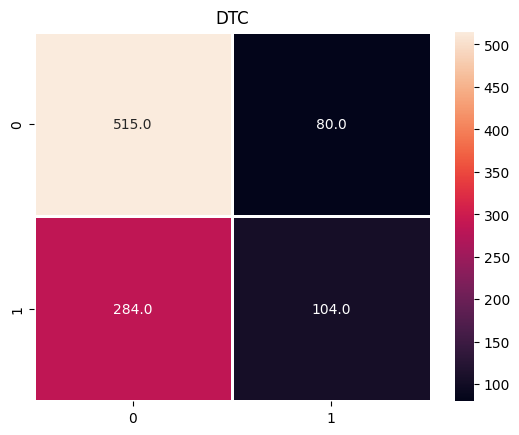

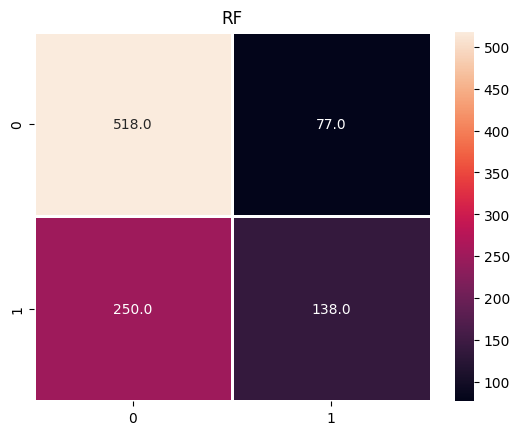

In [20]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

<a id="10"></a>
## Visualize Decision Tree

In [21]:
dt_clf = models[0][1]
dt_clf

DecisionTreeClassifier(max_depth=3)

In [ ]:
plt.figure(figsize = (25,20))
tree.plot_tree(dt_clf,
               feature_names =  df.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()

<a id="11"></a>
## Random Forest Hyperparameter Tuning

In [ ]:
model_params = {
    "Random Forest":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10, 50, 100],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,21,3))
        }
    }
    
}
model_params

In [24]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)
scores = []
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv = cv, n_iter = 10)
    rs.fit(X,y)
    scores.append([model_name, dict(rs.best_params_),rs.best_score_])
scores

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 19},
  0.6724671848817725]]

<a id="12"></a>
## Conclusion

* The TDS levels appear to contain some outliers, with values approximately 40 times higher than the upper limit for safe drinking water.

* The data includes nearly an equal number of water samples with acidic and basic pH levels.

* 92% of the data was classified as Hard.

* Only 2% of the water samples were deemed safe regarding Chloramine levels.

* Only 1.8% of the water samples were safe concerning Sulfate levels.

* 90.6% of the water samples had Carbon levels higher than the typical levels in drinking water (10 ppm).

* 76.6% of the water samples were found to be suitable for drinking in terms of Trihalomethane levels.

* 90.4% of the water samples were found to be safe for drinking concerning Turbidity.

* The correlation coefficients between the features were very low.

* Random Forest and XGBoost worked best for training the model.

### Kaynakça 
* https://www.kaggle.com/code/georgyzubkov/water-quality-exploratory-data-analysis-ml-rf
* https://www.kaggle.com/code/kanncaa1/water-quality-explanatory-data-analysis



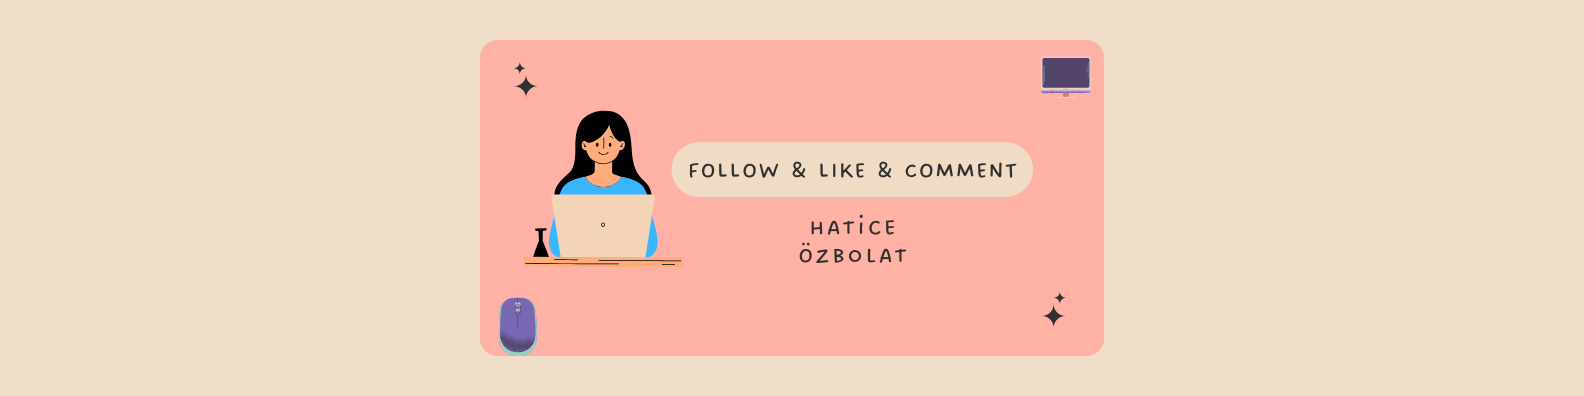